In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.keys import Keys

import urllib2
import bs4 
import string

import facepy
import re
import csv
import datetime
import urllib
import io
import httplib

In [59]:
data_jeremy = pd.read_csv('scraper/data.csv')

links = list(set(list(data_jeremy['link'])))
users = list(set(list(data_jeremy['Facebook user id'])))

matrix = pd.DataFrame(np.zeros((len(links), len(users))))
matrix.index = links
matrix.columns = users

for i in data_jeremy.iterrows():
    matrix.loc[i[1][0], i[1][2]] = 1
    
for i in matrix:
    if sum(matrix[i]) == 1:
        matrix.drop(i, 1, inplace=True)
        
matrix = matrix.T
        
import sklearn.decomposition
PCA = sklearn.decomposition.PCA(2)
reduced = PCA.fit_transform(matrix)

import sklearn.cluster
kmeans = sklearn.cluster.KMeans(5)
kmeans = kmeans.fit(reduced)

In [73]:
reduced.shape

(2110, 2)

In [74]:
clusters = k_means(reduced, 5)

In [75]:
clusters

[[0, 0, array([ 0.34926876, -0.09740257])],
 [0, 1, array([ 0.35300537, -0.09986511])],
 [0, 3, array([ 0.36238672, -0.11082936])],
 [0, 4, array([ 0.38222187, -0.11865476])],
 [0, 7, array([ 0.3496358 , -0.06238455])],
 [0, 8, array([ 0.34484471, -0.09490064])],
 [0, 11, array([ 0.37768917, -0.1066865 ])],
 [0, 12, array([ 0.34360482, -0.08334261])],
 [0, 13, array([ 0.36485353, -0.10695801])],
 [0, 14, array([ 0.35452581, -0.1009723 ])],
 [0, 18, array([ 0.37691703, -0.11816618])],
 [0, 23, array([ 0.34822216, -0.06562519])],
 [0, 24, array([ 0.4590151 ,  0.54936909])],
 [0, 26, array([ 0.35048643, -0.03548913])],
 [0, 29, array([ 0.37727277,  0.08974787])],
 [0, 32, array([ 0.34717406, -0.0663203 ])],
 [0, 33, array([ 0.35520086, -0.01915655])],
 [0, 35, array([ 0.35970207, -0.10401326])],
 [0, 53, array([ 0.35970207, -0.10401326])],
 [0, 72, array([ 0.35970207, -0.10401326])],
 [0, 217, array([ 0.35970207, -0.10401326])],
 [0, 332, array([ 0.35970207, -0.10401326])],
 [0, 463, arra

In [77]:
indexed_matrix = matrix.reset_index()
indexed_matrix[:5]

,index,http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1,https://www.youtube.com/watch?v=P7dEJuBKG28,http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/,http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html,http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding,http://inhabitat.com/california-is-sinking-2-inches-a-month-because-of-drought-driven-groundwater-pumping/,http://phys.org/news/2015-01-plant-e-street-alive.html,http://news.nationalgeographic.com/2015/08/150825-national-parks-photos-unknown-free-99-anniversary,http://t.co/QPP2xDSutt,...,http://t.co/6JxxMecNXA,http://www.inc.com/magazine/201411/lindsay-blakely/how-jessica-alba-proved-her-doubters-were-wrong.html,http://www.motherjones.com/politics/2015/04/true-cost-of-gun-violence-in-america,http://readonlymemory.vg/the-making-of-lemmings/,https://www.macfound.org/fellows/941/,http://www.computerworld.com/article/2973483/sustainable-it/samsung-mit-say-their-solid-state-batteries-could-last-a-lifetime.html,http://www.dailymail.co.uk/sciencetech/article-2677858/Bad-news-vegetarians-Plants-hear-eaten.html,http://techcrunch.com/2015/01/15/classpass-is-in-session-with-40-million-in-series-b/,http://mobile.nytimes.com/2015/10/04/opinion/sunday/peter-wehner-seeking-president-no-experience-necessary.html,http://mashable.com/2015/03/27/tim-cook-apple-fortune/
0,10101283842875395,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10102003312058373,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10156265407635463,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10154323967033356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10208356351765167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
print reduced.shape
print len(users)
print len(clusters)
print matrix.shape
matrix[:2]

(3032, 2)
4741
3032
(3032, 2110)


,10101283842875395,10102003312058373,10156265407635463,10154323967033356,10208356351765167,10153822219771934,10156186222895136,10153763216139723,10208092292243493,10102003304628263,...,10207328365621241,10153136696425124,10153721157312480,10153094593970146,10208585830752231,10153826010349551,837421253971,10102003329982453,10153402971234296,10104041155334143
http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.youtube.com/watch?v=P7dEJuBKG28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from scipy.cluster.vq import vq, kmeans, whiten

compressed_centroids = kmeans(reduced, 100)
centroids = []
for centroid in compressed_centroids[0]:
    centroids.append(np.dot(principal_components, centroid))

In [82]:
centroids

[array([ 0.00374256+0.j,  0.00080947+0.j,  0.00414330+0.j, ...,
         0.00047202+0.j,  0.00180591+0.j,  0.00347467+0.j]),
 array([-0.00681143+0.j, -0.00026543+0.j, -0.00326158+0.j, ...,
        -0.00026258+0.j, -0.00055138+0.j, -0.00277037+0.j]),
 array([  1.95670970e-02+0.j,  -7.20675918e-04+0.j,   4.11465181e-03+0.j,
        ...,   2.17946990e-05+0.j,  -1.77507132e-03+0.j,
          3.59472330e-03+0.j]),
 array([-0.00094901+0.j, -0.00028637+0.j, -0.00133800+0.j, ...,
        -0.00015975+0.j, -0.00064162+0.j, -0.00111972+0.j]),
 array([-0.00437283+0.j, -0.00025537+0.j, -0.00239490+0.j, ...,
        -0.00021053+0.j, -0.00054640+0.j, -0.00202850+0.j]),
 array([-0.00858258+0.j, -0.00027966+0.j, -0.00391555+0.j, ...,
        -0.00030379+0.j, -0.00057067+0.j, -0.00332954+0.j]),
 array([-0.00395496+0.j, -0.00024557+0.j, -0.00221780+0.j, ...,
        -0.00019763+0.j, -0.00052727+0.j, -0.00187764+0.j]),
 array([-0.00547052+0.j, -0.00026047+0.j, -0.00278704+0.j, ...,
        -0.00023424+0.j

In [85]:
def recommend_link(user):
    max_distance = 0
    recommendation = None
    for centroid in centroids:
        if np.linalg.norm(user - centroid) > max_distance:
            max_distance = np.linalg.norm(user-centroid)
            recommendation = links[np.argmax(centroid)]
    return recommendation

In [87]:
for i in users:
    print recommend_link(i)

http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.com/30under30/#/
http://www.forbes.co

In [45]:
def l2_norm(vector1, vector2):
	return math.sqrt(sum(v**2 for v in (vector1 - vector2)))

In [49]:
import numpy as np
import random

def L2_norm(vector):
    count = 0
    for i in vector:
        i = i**2
        count += i
    norm = np.sqrt(count)
    return norm

def cluster(x_train, means):
    clusters = {}
    # Assign each datapiont to a cluster based on L2 distance to cluster center
    for datapoint in x_train:
        best_mean_key = min([(i[0], L2_norm(datapoint-means[i[0]])) \
                        for i in enumerate(means)], key=lambda t:t[1])[0]
        try:
            clusters[best_mean_key].append(datapoint)
        except KeyError:
            clusters[best_mean_key] = [datapoint]
    return clusters

def reevaluate_cluster_centers(means, clusters):
    # Calculate the new cluster means with the updated cluster assignments
    newmeans = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmeans.append(np.mean(clusters[k], axis = 0))
    return newmeans

def terminated(means, oldmeans):
    # Check to see if the new means are the same as the old means
    return (set([tuple(a) for a in means]) == set([tuple(a) for a in oldmeans]))

def k_means(x_train, K):
    # Initialize Means
    oldmeans = random.sample(x_train, K)
    means = random.sample(x_train, K)
    while not terminated(means, oldmeans):
        oldmeans = means
        
        # Assign all points to a cluster
        clusters = cluster(x_train, means)
        
        # Re-evaluate cluster centers
        means = reevaluate_cluster_centers(oldmeans, clusters)
        
    cluster_list = []
    for i, j in clusters.iteritems():
        for k in j:
            cluster_list.append([i, k])

    final_array = []
    dummy_array = [0]*len(cluster_list)
    for i in range(len(cluster_list)):
        for j in range(len(x_train)):
            if (x_train[j] == cluster_list[i][1]).all():
                if dummy_array[j] != 1:
                    final_array.append([cluster_list[i][0], j, cluster_list[i][1]])
                dummy_array[j] = 1
                
    return(final_array)

In [68]:
for i in users:
    print recommend_link(i)

http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://www.forbes.com/30under30/#/
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://islands.im
http://isla

In [195]:
for i in matrix:
    if sum(matrix[i]) == 1:
        del matrix[i]

In [28]:
matrix

,http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1,https://www.youtube.com/watch?v=P7dEJuBKG28,http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/,http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html,http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding,http://inhabitat.com/california-is-sinking-2-inches-a-month-because-of-drought-driven-groundwater-pumping/,http://phys.org/news/2015-01-plant-e-street-alive.html,http://news.nationalgeographic.com/2015/08/150825-national-parks-photos-unknown-free-99-anniversary,http://t.co/QPP2xDSutt,https://x.ai?rf=on44o6,...,http://t.co/6JxxMecNXA,http://www.inc.com/magazine/201411/lindsay-blakely/how-jessica-alba-proved-her-doubters-were-wrong.html,http://www.motherjones.com/politics/2015/04/true-cost-of-gun-violence-in-america,http://readonlymemory.vg/the-making-of-lemmings/,https://www.macfound.org/fellows/941/,http://www.computerworld.com/article/2973483/sustainable-it/samsung-mit-say-their-solid-state-batteries-could-last-a-lifetime.html,http://www.dailymail.co.uk/sciencetech/article-2677858/Bad-news-vegetarians-Plants-hear-eaten.html,http://techcrunch.com/2015/01/15/classpass-is-in-session-with-40-million-in-series-b/,http://mobile.nytimes.com/2015/10/04/opinion/sunday/peter-wehner-seeking-president-no-experience-necessary.html,http://mashable.com/2015/03/27/tim-cook-apple-fortune/
10101283842875395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10102003312058373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10156265407635463,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10154323967033356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10208356351765167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10153822219771934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10156186222895136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10153763216139723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10208092292243493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10102003304628263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
        
def PCA(matrix):
    A = matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

matrix = matrix.T
coef, score, eigenvalues = PCA(matrix)

principal_components = coef[:,:2]
compressed = np.dot(matrix, principal_components)

In [34]:
print matrix.shape
matrix[:5]

(2110, 3032)


,http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1,https://www.youtube.com/watch?v=P7dEJuBKG28,http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/,http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html,http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding,http://inhabitat.com/california-is-sinking-2-inches-a-month-because-of-drought-driven-groundwater-pumping/,http://phys.org/news/2015-01-plant-e-street-alive.html,http://news.nationalgeographic.com/2015/08/150825-national-parks-photos-unknown-free-99-anniversary,http://t.co/QPP2xDSutt,https://x.ai?rf=on44o6,...,http://t.co/6JxxMecNXA,http://www.inc.com/magazine/201411/lindsay-blakely/how-jessica-alba-proved-her-doubters-were-wrong.html,http://www.motherjones.com/politics/2015/04/true-cost-of-gun-violence-in-america,http://readonlymemory.vg/the-making-of-lemmings/,https://www.macfound.org/fellows/941/,http://www.computerworld.com/article/2973483/sustainable-it/samsung-mit-say-their-solid-state-batteries-could-last-a-lifetime.html,http://www.dailymail.co.uk/sciencetech/article-2677858/Bad-news-vegetarians-Plants-hear-eaten.html,http://techcrunch.com/2015/01/15/classpass-is-in-session-with-40-million-in-series-b/,http://mobile.nytimes.com/2015/10/04/opinion/sunday/peter-wehner-seeking-president-no-experience-necessary.html,http://mashable.com/2015/03/27/tim-cook-apple-fortune/
10101283842875395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10102003312058373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10156265407635463,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10154323967033356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10208356351765167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [23]:
old_compressed = compressed

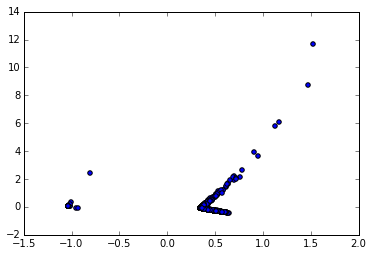

In [25]:
# principal_components = coef[:,:2]
# compressed = np.dot(matrix, principal_components)
plt.scatter(reduced[:,0], reduced[:,1])
plt.show()

In [31]:
reduced.shape

(2110, 2)

In [29]:
import numpy as np
import math
import pandas as pd
import random


def l2_norm(vector1, vector2):
	return math.sqrt(sum(v**2 for v in (vector1 - vector2)))

def cluster(data, means):
	clusters = {}
	for datapoint in data:
		store = float('inf')
		for index, mean in enumerate(means):
			if l2_norm(mean, datapoint) < store:
				min_index = index
				store = l2_norm(mean, datapoint)

		try:
			clusters[min_index].append(datapoint)
		except KeyError:
			clusters[min_index] = [datapoint]

	return clusters

def reassign_means(clusters):
	means = []
	for index, datapoint in enumerate(clusters):
		means.append(np.mean(datapoint))
	return means

def terminated(means, old_means):
	for i in old_means:
		for j in means:
			if (i == j).all():
				return True
			else:
				return False

def k_means(data, k):
	means = random.sample(data, k)
	old_means = random.sample(data, k)
	while (not terminated(means, old_means)):
		old_means = means
		clusters = cluster(data, means)
		means = reassign_means(clusters)

	return clusters

clusters = k_means(reduced_data[:50], 5)

(array([  3.74000000e+03,   8.32000000e+02,   3.15000000e+02,
          1.17000000e+02,   7.70000000e+01,   6.60000000e+01,
          3.80000000e+01,   3.00000000e+01,   1.30000000e+01,
          1.00000000e+01,   1.40000000e+01,   9.00000000e+00,
          5.00000000e+00,   1.10000000e+01,   4.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   1.00000000e+00]),
 array([  1.  ,   1.95,   2.9 ,   3.85,   4.8 ,   5.75,   6.7 ,   7.65,
          8.6 ,   9.55,  10.5 ,  11.45,  12.4 ,  13.35,  14.3 ,  15.25,
         16.2 ,  17.15,  18.1 ,  19.05,  20.  ]),
 <a list of 20 Patch objects>)

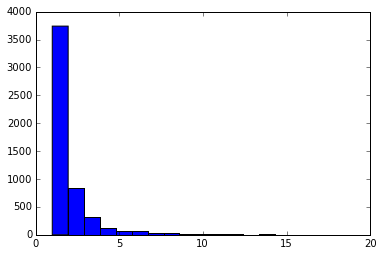

In [197]:
ht = {}
for i in list(data_jeremy['Facebook user id']):
    try:
        ht[i] += 1
    except KeyError:
        ht[i] = 1

values = ht.values()
for i in values:
    if i > 20:
        i = 0
plt.hist(values, bins = 20, range=[1, 20])

In [6]:
matrix.shape

(377, 1399)

In [3]:
def PCA(matrix):
    A = matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

coef, score, eigenvalues = PCA(matrix)

In [10]:
matrix.shape

(1399, 377)

In [6]:
for i in eigenvalues:
    print i

(0.414731214404+0j)
(0.20604560562+0j)
(0.12294441063+0j)
(0.11686667975+0j)
(0.101844549785+0j)
(0.0976182193358+0j)
(0.0862191040213+0j)
(0.0783777923148+0j)
(0.0700325538393+0j)
(0.0663906109793+0j)
(0.0574913222457+0j)
(0.0518432183054+0j)
(0.0493560388863+0j)
(0.0480642393047+0j)
(0.0457375540967+0j)
(0.0450764095978+0j)
(0.0437997106885+0j)
(0.0429675808216+0j)
(0.0423257751992+0j)
(0.0409322437814+0j)
(0.0406093769587+0j)
(0.0402587198535+0j)
(0.0385699043841+0j)
(0.0377806158004+0j)
(0.036729638124+0j)
(0.0353254969741+0j)
(0.0344440968769+0j)
(0.0340119044163+0j)
(0.0337046806453+0j)
(0.0330452411398+0j)
(0.0326911227109+0j)
(0.0326281924729+0j)
(0.0320257913309+0j)
(0.0318218317333+0j)
(0.0306274154025+0j)
(0.0297967276391+0j)
(0.0289618486474+0j)
(0.0283049921194+0j)
(0.0278973702056+0j)
(0.026809791552+0j)
(0.026610184051+0j)
(0.0264615329947+0j)
(0.0255028211846+0j)
(0.0241152192063+0j)
(0.0238891254337+0j)
(0.0231589178248+0j)
(0.0230069234486+0j)
(0.0222923627173+0j)
(0.

In [19]:
principal_components = coef[:,:2]
compressed = np.dot(matrix, principal_components)

In [20]:
print compressed.shape
compressed

(1399, 2)


array([[ 0.01252987+0.j,  0.02293613+0.j],
       [ 0.01924261+0.j,  0.04143806+0.j],
       [ 0.48992211+0.j, -1.52412801+0.j],
       ..., 
       [-1.34846692+0.j, -0.32015090+0.j],
       [ 0.32468355+0.j, -1.12609927+0.j],
       [ 0.07052112+0.j,  0.18739171+0.j]])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter(compressed[0], compressed[1])
plt.show()

In [36]:
s = []
for url in links:
    driver = webdriver.PhantomJS()
    driver.wait = WebDriverWait(driver, 2)
    driver.get(url)
    time.sleep(2)
    source = driver.page_source
    soup = bs4.BeautifulSoup(source)
    s.append(soup.find_all('p'))


In [37]:
from htmllaundry import strip_markup

In [18]:
for link in links:
    print link

http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1
https://www.youtube.com/watch?v=P7dEJuBKG28
http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/
http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html
http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding
http://inhabitat.com/california-is-sinking-2-inches-a-month-because-of-drought-driven-groundwater-pumping/
http://phys.org/news/2015-01-plant-e-street-alive.html
http://news.nationalgeographic.com/2015/08/150825-national-parks-photos-unknown-free-99-anniversary
http://t.co/QPP2xDSutt
https://x.ai?rf=on44o6
http://www.wired.com/2015/09/climate-change-means-one-worlds-death-anothers-birth/
https://www.proptiger.com/guide/post/the-worlds-most-paradoxical

In [ ]:
content = []
mport csv
with open('some.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(someiterable)

In [123]:
data_jeremy = pd.read_csv('scraper/data.csv')
links = list(set(list(data_jeremy['link'])))
import csv
with open('streaming.csv', 'a') as f:
    writer = csv.writer(f)
    for index, link in enumerate(links):
        if index < 11:
            try:
                htmlfile = urllib.urlopen(link)
                source = htmlfile.read()
                split = source.split()
                for i, v in enumerate(split):
                    if '<' in v or '=' in v or '-' in v or '>' in v or '/' in v or '\\' in v or '\'' in v or '(' in v or ')' in v or '[' in v or ']' in v or '#' in v or ';' in v or '{' in v or '}' in v:
                        split[i] = ''
                joined = string.join(split)
                writer.writerow([index, link, joined])
                content.append([link, joined])
                print index, link[:30], joined[:70]
            except IOError:
                pass

0 http://news-beta.nationalgeogr                                       stars galaxies skin space astrop
1 https://www.youtube.com/watch?        Medium     &&   10pt Roboto",  10pt Roboto",  ytcsi       ||  +
2 http://inhabitat.com/vancouver    IE    ie7"    IE    ie8"      &        Chartbeat       Chartbeat   
3 http://www.nytimes.com/2015/09 
4 http://montrealgazette.com/bus    IE      ie8 oldie"    gt IE                        startup Breather
5 http://inhabitat.com/californi    IE    ie7"    IE    ie8"      &        Chartbeat       Chartbeat   
6 http://phys.org/news/2015-01-p ff10            makes street lights come alive from living     news, h
7 http://news.nationalgeographic                                                                       
8 http://t.co/QPP2xDSutt    lt IE 7    ie6         IE 7    ie7        IE 8    ie8       IE 9   
9 https://x.ai?rf=on44o6                                                                       
10 http://www.wired.com/2015/09/c    lt IE   i

In [122]:
saved = content

In [97]:
data_jeremy = pd.read_csv('scraper/data.csv')
links = list(set(list(data_jeremy['link'])))
content = []
driver = webdriver.PhantomJS()
driver.wait = WebDriverWait(driver, 2)
for index, link in enumerate(links):
    if index > len(content)-1:
        try:
            driver.get(link)
            time.sleep(2)
            try:
                source = driver.page_source
            except:
                driver.get(link)
                time.sleep(10)
                source = driver.page_source
                time.sleep(10)
                count += 1
                pass
            split = source.split()
            for i, v in enumerate(split):
                if '<' in v or '=' in v or '-' in v or '>' in v or '/' in v or '\\' in v or '\'' in v or '(' in v or ')' in v or '[' in v or ']' in v or '#' in v or ';' in v or '{' in v or '}' in v:
                    split[i] = ''
            joined = string.join(split)
            content.append([link, joined])
            print index, count
            print link
            print joined[:100]
            print ''
        except (httplib.BadStatusLine, NameError, urllib2.URLError, urllib2.HTTPError):
            content.append([link, 'Error'])
            count += 1
            print index
            print link
            print 'ERROR'
            pass
df = pd.DataFrame(content)
df.columns = ['Links', 'Content']
df.to_csv('content_finished.csv', encoding='utf-8')
driver.quit()


0 0
http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1
        js flexbox canvas canvastext touch  postmessage indexeddb hashchange history draganddrop web

1 0
https://www.youtube.com/watch?v=P7dEJuBKG28
           Medium         &&   10pt Roboto",  10pt Roboto",  ytcsi       ||  +   ||        t,    t |

2 0
http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/
  IE    ie7"   IE    ie8"     &       Chartbeat                              Chartbeat              

3 0
http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html
   IE                             desktop                                                           

4 0
http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding
   IE                      

In [148]:
concat = pd.read_csv('link_content.csv')
concat.columns = ['index', 'link', 'content']
text = concat['content']
for i in text:
    print str(i)[:300]

                                      stars galaxies skin space astrophysics dna                                            152, 162, 225, 210, 224, 280, 352, 470, 536, 590, 676, 710, 768, 885, 945, 1190,          function   var metas   for    i     if     return    return      Global namespaces. wi
       Medium     &&   10pt Roboto",  10pt Roboto",  ytcsi       ||  +   ||        t,    t || +new   s, e,     ? e : +new     s,      v,      t,   s,  t,     w.performance || w.mozPerformance ||w.msPerformance ||  ytcsi.perf ? ytcsi.perf.timing.responseStart :  isPrerender   ||    vName  d.webkitVis
   IE    ie7"    IE    ie8"      &        Chartbeat       Chartbeat                 pledges to switch to 100% renewable energy | Inhabitat  Sustainable Design Innovation, Eco Architecture, Green     will be powered by 100 percent renewable energy"             Canada, has become the latest city to co
nan
   IE      ie8 oldie"    gt IE                        startup Breather raises $20M in funding

In [141]:
concat.to_csv('link_content.csv', index=False)

In [132]:
data = pd.read_csv('streaming.csv')
frames = [data[-11:],data[:-11]]
concat = pd.concat(frames)
print concat[:5]
print concat[-5:]

      index                                               link  \
3009      0  http://news-beta.nationalgeographic.com/2015/0...   
3010      1        https://www.youtube.com/watch?v=P7dEJuBKG28   
3011      2  http://inhabitat.com/vancouver-pledges-to-swit...   
3012      3  http://www.nytimes.com/2015/09/29/science/spac...   
3013      4  http://montrealgazette.com/business/local-busi...   

                                                content  
3009                                        stars ga...  
3010         Medium     &&   10pt Roboto",  10pt Rob...  
3011     IE    ie7"    IE    ie8"      &        Char...  
3012                                                NaN  
3013     IE      ie8 oldie"    gt IE                ...  
      index                                               link  \
3004   3027  http://www.computerworld.com/article/2973483/s...   
3005   3028  http://www.dailymail.co.uk/sciencetech/article...   
3006   3029  http://techcrunch.com/2015/01/15/classpass-i

In [89]:
df = pd.DataFrame(content)
df.columns = ['Links', 'Content']
df.to_csv('content_finished.csv', encoding='utf-8')

In [54]:
df = pd.DataFrame(content)
df.columns = ['Links', 'Content']
df.to_csv('ugly_scrape', encoding='utf-8')

In [89]:
# for i, v in enumerate(flat):
#     if v == '>':
#         flat[i] = ' '
        
# for i, v in enumerate(flat):
#     if v == '<' and flat[i+1] == p:
#         flat[i] = ' '
#         flat[i+1] = ' '
split = flat.split()
for i, v in enumerate(split):
    if '<' in v or '=' in v or '-' in v or '>' in v or '/' in v or '\\' in v or '\'' in v:
        split[i] = ''
split

['[',
 '',
 '',
 '',
 '',
 '',
 'best',
 'friendships',
 'are',
 'infrequent',
 'but',
 'intense.',
 'I',
 'want',
 'to',
 'embrace',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'and',
 'I',
 'are',
 'calling',
 'it',
 'chums.',
 'Chums',
 'have',
 'long',
 'stretches',
 'of',
 'individual',
 'progress',
 'on',
 'the',
 'friendship,',
 'punctured',
 'with',
 'an',
 'unleash',
 'of',
 'affection,',
 'thoughts,',
 'clarity',
 'and',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'you',
 '',
 '',
 '',
 '',
 '',
 '',
 'contrast,',
 'mates',
 'are',
 'traditional',
 'best',
 'friends.',
 'Mates',
 'are',
 'present,',
 'supportive,',
 'available.',
 'Chums',
 'and',
 'mates',
 'help',
 'us',
 'grow',
 'in',
 'different',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'important',
 'to',
 'have',
 'one',
 '',
 'mate.',
 'I',
 'think',
 'I',
 'know',
 'who',
 'that',
 'person',
 'is',
 'in',
 'my',
 'life:',
 'for',
 'some',
 'people,',
 'it\xe2\x80\x99s',
 'their',
 '',
 '',
 '

'[      best friendships are infrequent but intense. I want to embrace            and I are calling it chums. Chums have long stretches of individual progress on the friendship, punctured with an unleash of affection, thoughts, clarity and             you       contrast, mates are traditional best friends. Mates are present, supportive, available. Chums and mates help us grow in different        important to have one  mate. I think I know who that person is in my life: for some people, it\xe2\x80\x99s their    designer. Previously: designed theme parks at     profile for  studied at     profile for  helped you track your flights at     profile for   live 30,000 days. Today is my day   Every day at 8pm,         calls me with a 60 second prompt: What do you want to remember about   Happy to add you to the     New Urban Mechanics, Program   Urban Mechanics is looking for an    who excels at    acting quickly, and collaborating comfortably. Program Managers are    working inside of local g

In [53]:
strip_markup(str(np.array(s).flatten()))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 2: ordinal not in range(128)

In [33]:
from urllib import urlopen
from bs4 import BeautifulSoup
html = urlopen(url).read()
soup = BeautifulSoup(source, 'html.parser')
soup.get_text()

u"\n\n\n\n  \n\nAccess denied | medium.com used CloudFlare to restrict access\n\n\n\n\n\n\n\nbody{margin:0;padding:0}\n\n\n\n\n\n\nPlease enable cookies.\n\n\n\nError\n1010\nRay ID: 25036b376f921ee9 \u2022 2015-12-05 23:09:27 UTC\n\nAccess denied\n\n\n\n\n\nWhat happened?\nThe owner of this website (medium.com) has banned your access based on your browser's signature (25036b376f921ee9-ua48).\n\n\n\n\n\nCloudFlare Ray ID: 25036b376f921ee9\n\u2022\nYour IP: 209.129.89.50\n\u2022\nPerformance & security by CloudFlare\n\n\n\n\n\n  window._cf_translation = {};\n  \n  \n\n\n\n"

In [32]:
type(html)

str

In [15]:
for i in links:
    print i

http://news-beta.nationalgeographic.com/2015/01/150128-big-bang-universe-supernova-astrophysics-health-space-ngbooktalk/?utm_source=Facebook&utm_medium=Social&utm_content=link_fb20150128news-spacebooktalk&utm_campaign=Content&sf7156883=1
https://www.youtube.com/watch?v=P7dEJuBKG28
http://inhabitat.com/vancouver-pledges-to-switch-to-100-percent-renewable-energy/
http://www.nytimes.com/2015/09/29/science/space/mars-life-liquid-water.html
http://montrealgazette.com/business/local-business/montreal-based-startup-breather-raises-20m-in-funding
http://inhabitat.com/california-is-sinking-2-inches-a-month-because-of-drought-driven-groundwater-pumping/
http://phys.org/news/2015-01-plant-e-street-alive.html
http://news.nationalgeographic.com/2015/08/150825-national-parks-photos-unknown-free-99-anniversary
http://t.co/QPP2xDSutt
https://x.ai?rf=on44o6
http://www.wired.com/2015/09/climate-change-means-one-worlds-death-anothers-birth/
https://www.proptiger.com/guide/post/the-worlds-most-paradoxical

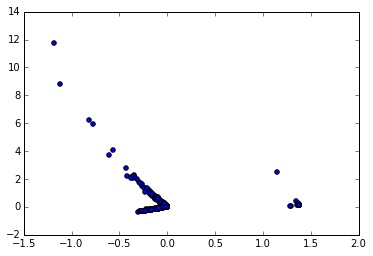

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_jeremy = pd.read_csv('scraper/data.csv')

links = list(set(list(data_jeremy['link'])))
users = list(set(list(data_jeremy['Facebook user id'])))

matrix = pd.DataFrame(np.zeros((len(links), len(users))))
matrix.index = links
matrix.columns = users

for i in data_jeremy.iterrows():
    matrix.loc[i[1][0], i[1][2]] = 1

for i in matrix:
    if sum(matrix[i]) == 1:
        matrix.drop(i, 1, inplace=True)

        
def PCA(matrix):
    A = matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

matrix = matrix.T
coef, score, eigenvalues = PCA(matrix)

principal_components = coef[:,:2]
compressed = np.dot(matrix, principal_components)
plt.scatter(compressed[:,0], compressed[:,1])
plt.show()

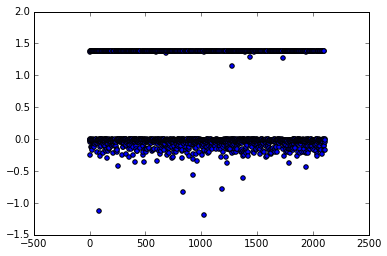

In [9]:
plt.scatter(np.arange(len(compressed[:,0])), compressed[:,0])

(array([  2.07000000e+03,   2.70000000e+01,   7.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -0.33632477+0.j,   0.87454187+0.j,   2.08540851+0.j,
          3.29627515+0.j,   4.50714179+0.j,   5.71800843+0.j,
          6.92887507+0.j,   8.13974171+0.j,   9.35060835+0.j,
         10.56147499+0.j,  11.77234163+0.j]),
 <a list of 10 Patch objects>)

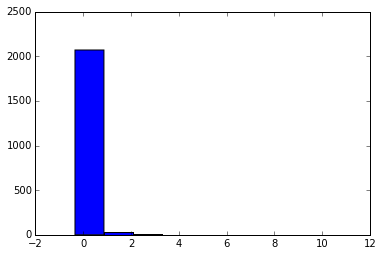

In [12]:
plt.hist(compressed[:,1])

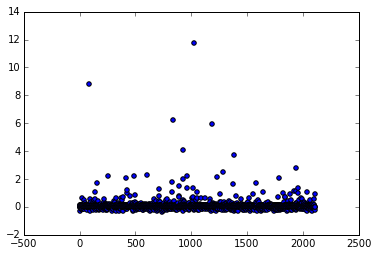

In [10]:
plt.scatter(np.arange(len(compressed[:,0])), compressed[:,1])